In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

from grid_criticality import analysis_path

import plot_utils as pu

In [2]:
data = pd.read_csv(f'{analysis_path}/criticality_data.csv', index_col=0)

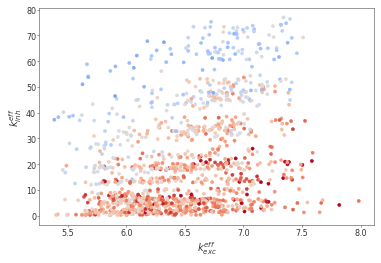

In [3]:
def plot_all(ax):
    m = ax.scatter(data['k_exc_steady'], data['k_inh_steady'], c=data['delta_p'], cmap='coolwarm', s=10, vmin=-1, vmax=1)
    ax.set_xlabel('$k^{eff}_{exc}$', fontsize=plt.rcParams['axes.titlesize'])
    ax.set_ylabel('$k^{eff}_{inh}$', fontsize=plt.rcParams['axes.titlesize'])

fig, ax = plt.subplots()
plot_all(ax)

r = 0.6915, p = 8.65e-27
slope = 28.32, intercept = -152.9
N = 179


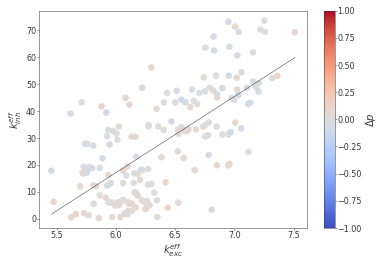

In [4]:
def plot_critical(ax):
    critical = data['delta_p'].abs() < 0.1
    ecrit, icrit = data['k_exc_steady'][critical], data['k_inh_steady'][critical]
    m = ax.scatter(ecrit, icrit, c=data['delta_p'][critical], cmap='coolwarm', vmin=-1, vmax=1)

    fit = linregress(data['k_exc_steady'][critical], data['k_inh_steady'][critical])
    ax.plot(np.array([ecrit.min(), ecrit.max()]), fit.slope*np.array([ecrit.min(), ecrit.max()]) + fit.intercept, c=pu.styling.offblack)

    ax.set_xlabel('$k^{eff}_{exc}$', fontsize=plt.rcParams['axes.titlesize'])
    ax.set_ylabel('$k^{eff}_{inh}$', fontsize=plt.rcParams['axes.titlesize'])
    plt.colorbar(m, ax=ax).set_label('$\\Delta p$', fontsize=plt.rcParams['axes.titlesize'])

    # plt.title(f'r = {fit.rvalue:.2g}, p = {fit.pvalue:.2g}')
    print(f'r = {fit.rvalue:.4g}, p = {fit.pvalue:.4g}')
    print(f'slope = {fit.slope:.4g}, intercept = {fit.intercept:.4g}')
    print(f'N = {critical.sum()}')

fig, ax = plt.subplots()
plot_critical(ax)

r = 0.6915, p = 8.65e-27
slope = 28.32, intercept = -152.9
N = 179


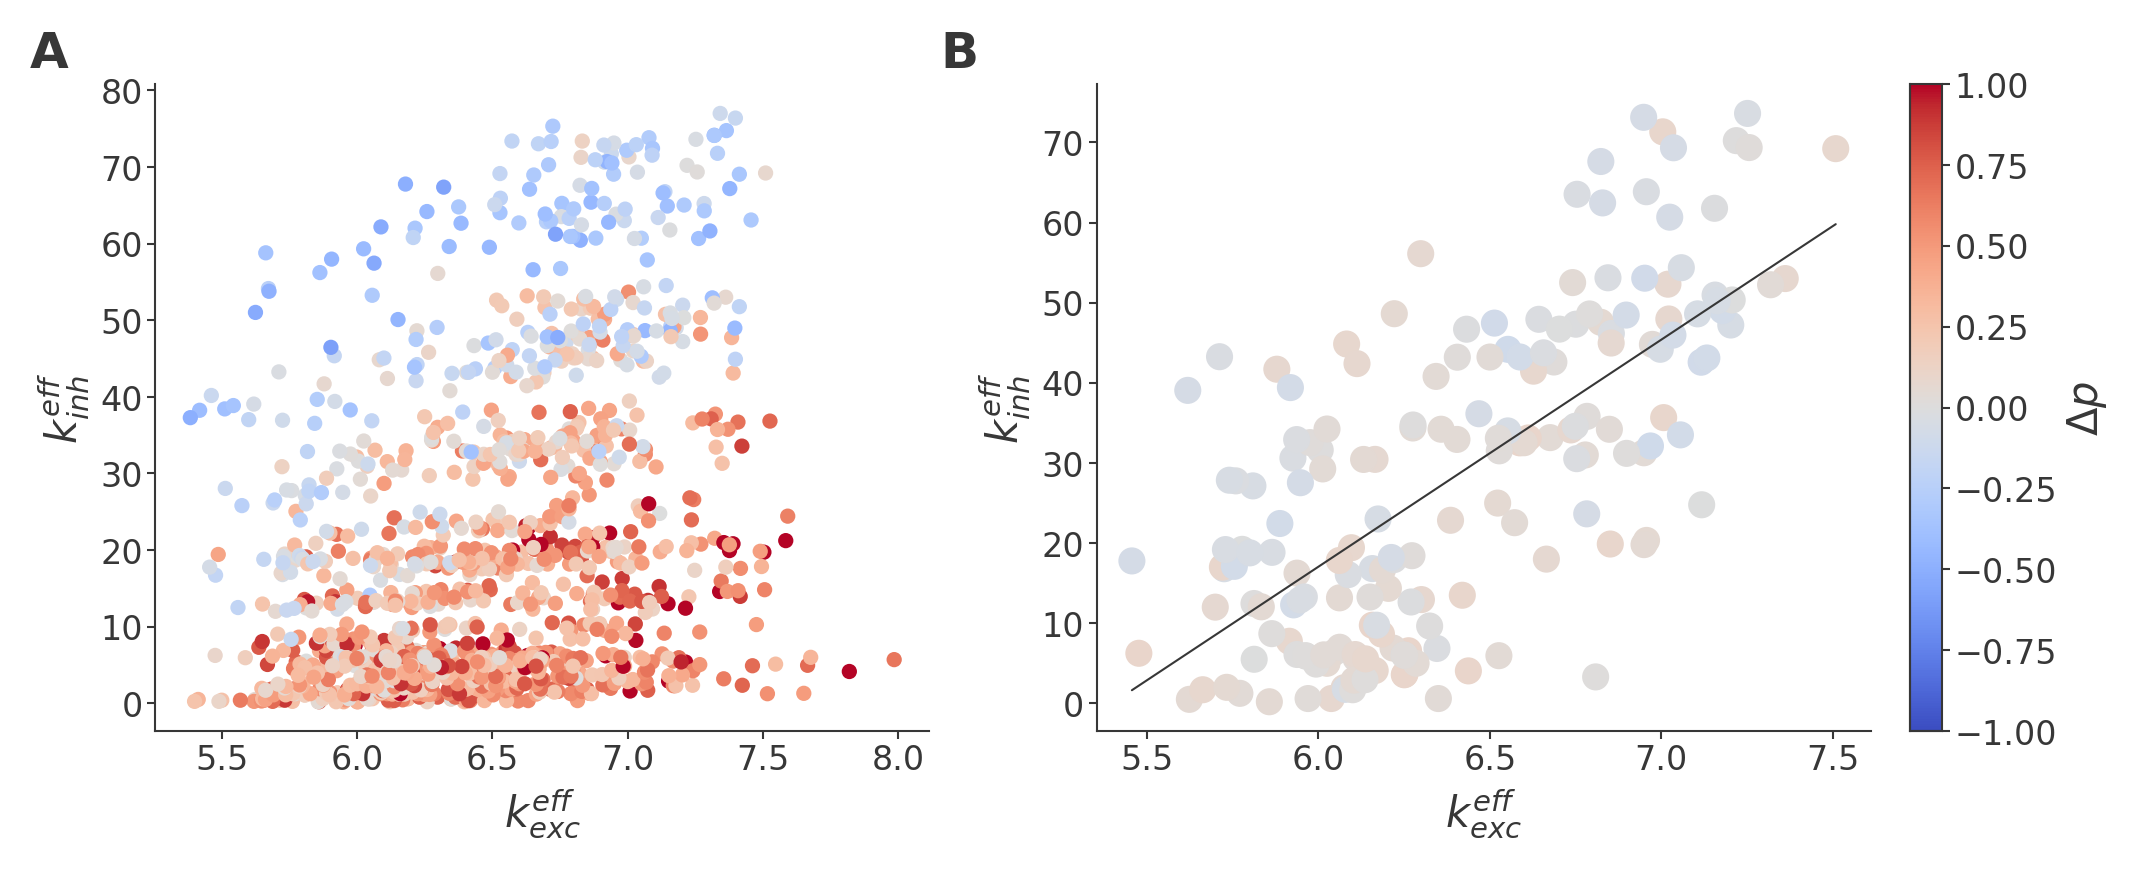

In [5]:
fig, axs = plt.subplots(1,2, figsize=pu.fullwidth(2.5), dpi=300, layout='compressed', facecolor='w')
plot_all(axs[0])
plot_critical(axs[1])
sns.despine()
for i, ax in enumerate(axs):
    pu.label_panel(ax, i)

fig.savefig('Figure 5.tif', bbox_inches='tight')

In [6]:
spacetime = pd.read_pickle(f'{analysis_path}/weights_spacetime.pkl')

In [7]:
spacetime['Ix_satratio_final'] = spacetime.apply(lambda row: row['Ix_satratio_time'][-1], axis=1)

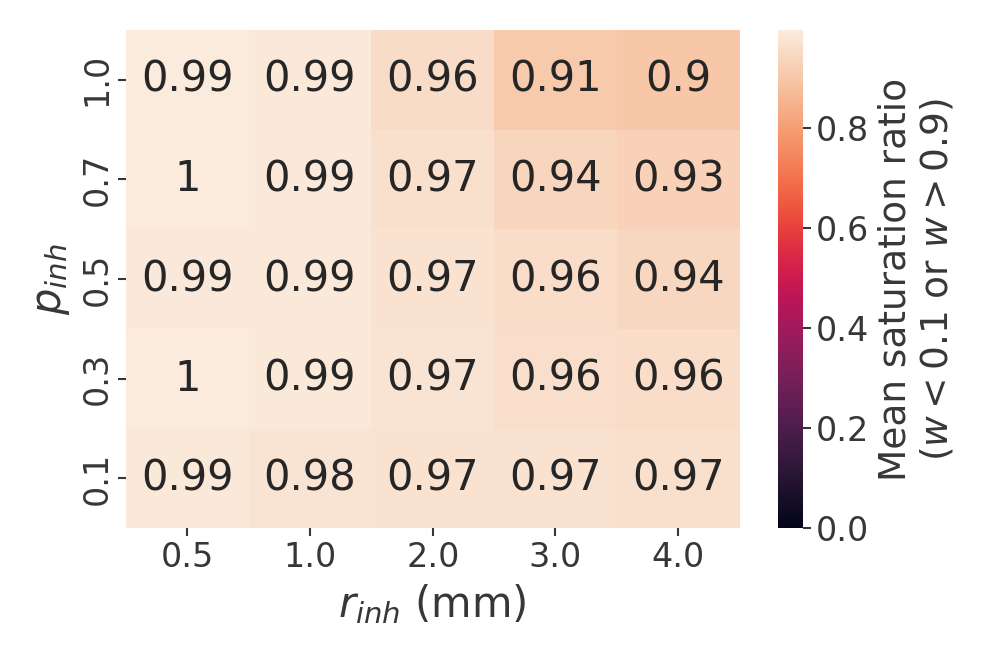

In [8]:
fig, ax = plt.subplots(figsize=pu.halfwidth(2), facecolor='w', dpi=300)

satratio = spacetime.groupby(['p_inh', 'r_inh'])['Ix_satratio_final'].mean()
sns.heatmap(satratio.unstack()[::-1], annot=True, cbar_kws={'label': 'Mean saturation ratio\n($w < 0.1$ or $w > 0.9$)'}, vmin=0)
ax.set_xlabel('$r_{inh}$ (mm)', fontsize=plt.rcParams['axes.titlesize'])
ax.set_ylabel('$p_{inh}$', fontsize=plt.rcParams['axes.titlesize'])

fig.savefig('Figure 5.Suppl1.tif', bbox_inches='tight')